In [558]:
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as px
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np



In [559]:
def load_data(files):
    data_dict = {}

    for file in files:
        filename = file.split("/")[-1].split(".")[0]
        data_dict[filename] = pd.read_csv(file)

    return data_dict

csv_files = [
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/circuits.csv",
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/constructor_results.csv",
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/constructor_standings.csv",
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/constructors.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/driver_standings.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/drivers.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/lap_times.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/pit_stops.csv",
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/qualifying.csv",
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/races.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/results.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/seasons.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/sprint_results.csv", 
    "/Users/AnhNguyen/Desktop/vscode/ML/Projet ML/status.csv"
    
]
data = load_data(csv_files)
# Access the data for a specific file, for example:
circuits = data["circuits"]
constructor_results = data["constructor_results"]
constructor_standings = data["constructor_standings"]
constructors = data["constructors"]
driver_standings = data["driver_standings"]
drivers = data["drivers"]
lap_times = data["lap_times"]
pit_stops = data["pit_stops"]
qualifying = data["qualifying"]
races = data["races"]
results = data["results"]
seasons = data["seasons"]
sprint_results = data["sprint_results"]
status = data["status"]

## 

##  En supprimant les colonnes que nous n'allons pas utiliser, et renommé aussi les colonnes spécs

In [560]:
# Races
races_gold = races.copy()
races_gold = races_gold.drop(columns = ['url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time'])
races_gold = races_gold.rename(columns ={'name':'race_name'})
#races_gold.info()

In [561]:
# Circuits 
circuits_gold = circuits.copy()
circuits_gold =circuits_gold.drop(columns = ['lat', 'lng','alt', 'url'])
circuits_gold = circuits_gold.rename(columns={'name':'circuit_name', 'location':'city'})
#circuits_gold.info()

In [562]:
# Drivers
drivers_gold = drivers.copy()
drivers_gold =drivers_gold.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_gold['driver_name'] = drivers_gold['forename'] + ' ' + drivers_gold['surname']
drivers_gold = drivers_gold.drop(columns =['forename', 'surname'])
#drivers_gold.info()

In [563]:
#Constructors
constructors_gold =constructors.copy()
constructors_gold =constructors_gold.drop(columns = ['url','constructorRef'])
constructors_gold = constructors_gold.rename(columns = {'name':'constructors_name'})
constructors_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   constructorId      211 non-null    int64 
 1   constructors_name  211 non-null    object
 2   nationality        211 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


In [564]:
#Results 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [565]:
constructor_results = constructor_results.drop(columns = ['status'])

## Merger les data frames
### status + races + drivers + constructors + circuits + results


In [478]:
merged_df = results.merge(status , on = 'statusId')
merged_df1 = merged_df.merge(races_gold, on = 'raceId')
merged_df2 = merged_df1.merge(drivers_gold, on = 'driverId')
merged_df3 = merged_df2.merge(constructors_gold, on = 'constructorId')
merged_df4 = merged_df3.merge(circuits_gold , on = 'circuitId')

#merged_df.info()
merged_df4.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,date,dob,nationality_x,driver_name,constructors_name,nationality_y,circuitRef,circuit_name,city,country
0,1,18,1,1,22,1,1,1,1,10.0,...,2008-03-16,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,371,36,1,1,2,4,3,3,3,6.0,...,2007-03-18,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
2,7573,1,1,1,1,18,\N,D,20,0.0,...,2009-03-29,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
3,20352,338,1,1,2,11,6,6,6,8.0,...,2010-03-28,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
4,20780,841,1,1,3,2,2,2,2,18.0,...,2011-03-27,1985-01-07,British,Lewis Hamilton,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia


#### Renommer les deux colonnes nationnalités dans le data frame merged_df

In [479]:
merged_df4 = merged_df4.rename(columns= {'nationality_x':'driver_nationality','nationality_y':'constructor_nationality'})

In [480]:
 #Les statitisques de bases
merged_df4.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074,1990.553144,8.368635,23.541488
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965,19.508665,4.949718,18.749739
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000,1991.000000,8.000000,18.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2023.000000,22.000000,79.000000


# Drivers:  Analyse de la performance des pilotes 

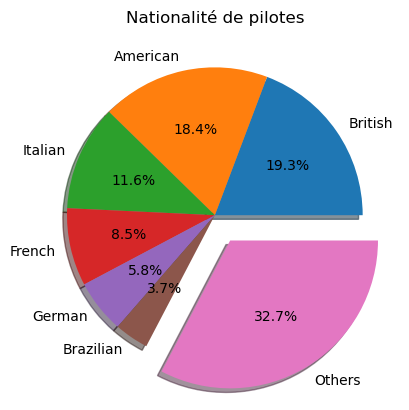

In [481]:
# Nationnalités des pilotes 
driver_country = merged_df4.groupby('driver_nationality').driver_name.nunique().reset_index() 

driver_country = driver_country.rename(columns = {'driver_name': 'driver_counts'})

driver_country1 = driver_country[driver_country.driver_counts >= 30].sort_values('driver_counts' ,ascending = False )

driver_country1.loc[len(driver_country1.index)] = ['Others', (driver_country.driver_counts.sum() - driver_country1.driver_counts.sum())]
plt.title('Nationalité de pilotes')

myexplode = [0,0,0,0,0,0,0.2]

plt.pie(driver_country1.driver_counts, labels= driver_country1.driver_nationality, autopct='%1.1f%%', explode= myexplode, shadow=True, startangle=360 );

In [482]:
driver_country["driver_nationality"].unique()

array(['American', 'American-Italian', 'Argentine', 'Argentine-Italian',
       'Australian', 'Austrian', 'Belgian', 'Brazilian', 'British',
       'Canadian', 'Chilean', 'Chinese', 'Colombian', 'Czech', 'Danish',
       'Dutch', 'East German', 'Finnish', 'French', 'German', 'Hungarian',
       'Indian', 'Indonesian', 'Irish', 'Italian', 'Japanese',
       'Liechtensteiner', 'Malaysian', 'Mexican', 'Monegasque',
       'New Zealander', 'Polish', 'Portuguese', 'Rhodesian', 'Russian',
       'South African', 'Spanish', 'Swedish', 'Swiss', 'Thai',
       'Uruguayan', 'Venezuelan'], dtype=object)

### Pilotes les plus points chaque année.  

In [483]:

#driver_analysis = merged_df.groupby(['year','driver_name']).agg({'points': 'sum'}).reset_index()
#max_points_index = driver_analysis.groupby('year')['points'].idxmax()
#driver_with_max_points_each_year = driver_analysis.loc[max_points_index]
#driver_analysis.info()
#regroupe ces données par année et par pilote, puis calcule la somme des points,
#le nombre de courses disputées pour chaque pilote au cours de chaque année.

In [484]:
#driver_with_max_points_each_year.head()

#### Le data frame résultante a un index à plusieurs niveaux et nous allons trier cela et renommer les colonnes pour effectuer plus d'analyse

In [485]:
#driver_analysis.columns = ['_'.join(col).strip() for col in driver_analysis.columns.values]
#driver_analysis = driver_analysis.rename( columns = {'year_':'year', 'driver_name_' : 'driver_name'})
#driver_analysis.info()

##  Le pilote avec le plus de points chaque année, ce qui nous fera devenir le champion des pilotes de cette année.

In [486]:
champion= merged_df2.groupby(['year', 'driver_name']).agg({'points':sum}).reset_index()
champion = champion.sort_values(['year','points'], ascending = False).groupby('year').head(1)
print(champion[['year','driver_name']].head(10))

      year     driver_name
3178  2023  Max Verstappen
3155  2022  Max Verstappen
3133  2021  Max Verstappen
3112  2020  Lewis Hamilton
3090  2019  Lewis Hamilton
3068  2018  Lewis Hamilton
3047  2017  Lewis Hamilton
3026  2016    Nico Rosberg
2998  2015  Lewis Hamilton
2977  2014  Lewis Hamilton


##  les pilotes ayant participé à au moins 100 courses

In [487]:
particip_plus = merged_df4.groupby(['driver_name', 'constructors_name'])['raceId'].nunique().sort_values(ascending=False).reset_index(name='races')

# Filtrer les pilotes ayant participé à au moins 100 courses
particip_plus = particip_plus[particip_plus['races'] >= 100]

particip_plus.head(10)

,driver_name,constructors_name,races
0,Lewis Hamilton,Mercedes,212
1,Michael Schumacher,Ferrari,181
2,Kimi Räikkönen,Ferrari,152
3,Max Verstappen,Red Bull,152
4,David Coulthard,McLaren,150
5,Felipe Massa,Ferrari,140
6,Jenson Button,McLaren,137
7,Nico Rosberg,Mercedes,136
8,Mika Häkkinen,McLaren,133
9,Jacques Laffite,Ligier,132


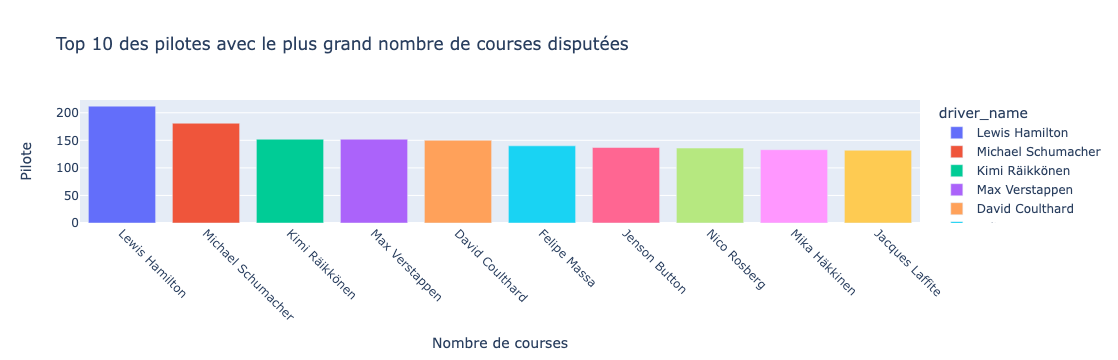

In [488]:

# Sélectionner les 10 premiers pilotes
top_10_participants = particip_plus.head(10)


fig = px.bar(top_10_participants, x='driver_name', y='races',color='driver_name',  title='Top 10 des pilotes avec le plus grand nombre de courses disputées')
fig.update_xaxes(title='Nombre de courses', tickangle=45)  
fig.update_yaxes(title='Pilote')
fig.show()

##  Pilotes les plus jeunes / âgés

In [489]:

drivers_gold['dob'] = pd.to_datetime(drivers_gold['dob'])

# Extraire l'année actuelle
current_year = pd.Timestamp.now().year

# Calculer l'âge de chaque pilote en soustrayant l'année de naissance de l'année actuelle
drivers_gold['age'] = current_year - drivers_gold['dob'].dt.year

# Trier les pilotes par âge croissant
youngest_drivers = drivers_gold.sort_values(by='age').reset_index(drop=True)
# Afficher pilotes les plus jeunes 
print(youngest_drivers.head(3)[['driver_name', 'age']])


      driver_name  age
0   Oscar Piastri   23
1  Logan Sargeant   24
2    Yuki Tsunoda   24


In [490]:
# Trier les pilotes par âge décroissant 
oldest_drivers = drivers_gold.sort_values(by='age', ascending=False).reset_index(drop=True)

# Afficher les premiers pilotes les plus âgés avec leur âge
print(oldest_drivers.head(3)[['driver_name', 'age']])


# => un peu sert à rien ^^

          driver_name  age
0  Philippe Étancelin  128
1       Luigi Fagioli  126
2        Arthur Legat  126



### Record de victoires

In [491]:
victoires = merged_df2.merge(seasons , on = 'year')
#victoires.info()
#Filtrer les résultats pour inclure uniquement les premières places
first_place_results = victoires[victoires['positionOrder'] == 1]
# Compter le nombre de victoires par pilote
victoires_count = first_place_results.groupby(['driver_name','nationality' ]).size().reset_index(name='Titres')

# Trier les résultats par le nombre de victoires
victoires_count = victoires_count.sort_values(by='Titres', ascending=False)
# Sélectionner uniquement les pilotes avec le plus grand nombre de victoires par saison
victoires_count = victoires_count.drop_duplicates(subset='driver_name', keep='first')


# Afficher les pilotes avec le plus grand nombre de titres mondiaux
print(victoires_count.head(10))


            driver_name nationality  Titres
65       Lewis Hamilton     British     103
74   Michael Schumacher      German      91
104    Sebastian Vettel      German      53
0           Alain Prost      French      51
73       Max Verstappen       Dutch      45
4          Ayrton Senna   Brazilian      41
24      Fernando Alonso     Spanish      32
80        Nigel Mansell     British      31
37       Jackie Stewart     British      27
81           Niki Lauda    Austrian      25


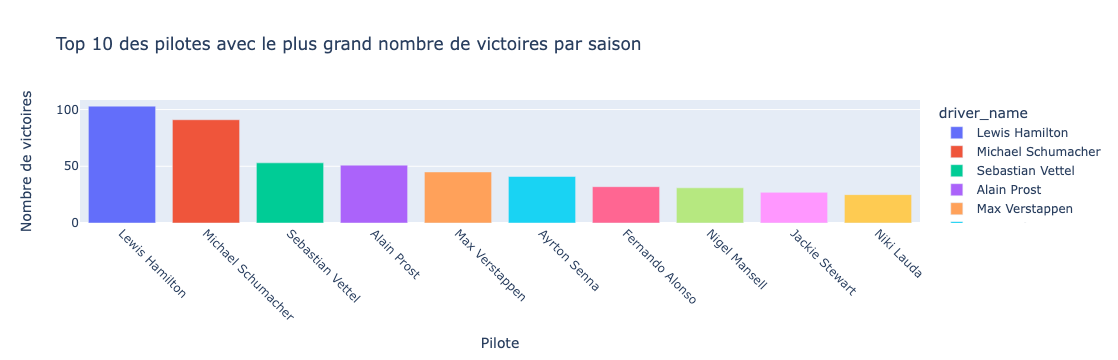

In [492]:

top_10_winners = victoires_count.head(10)

fig = px.bar(top_10_winners, x='driver_name', y='Titres',color='driver_name', title='Top 10 des pilotes avec le plus grand nombre de victoires par saison')
fig.update_xaxes(title='Pilote', tickangle=45)  
fig.update_yaxes(title='Nombre de victoires')
fig.show()

###  L'âge de pilote qui a remporté son premier championnat du monde
### Plus jeunes vainqueurs

In [493]:

first_championship_years = first_place_results.groupby('driverId')['year'].min().reset_index()

age_champions = pd.merge(first_championship_years, drivers_gold, left_on='driverId', right_on='driverId')

# Calculer l'âge de chaque pilote lorsqu'il a remporté son premier championnat
age_champions['age_at_first_championship'] = age_champions['year'] - age_champions['dob'].dt.year

# Trier les pilotes par âge croissant pour trouver les plus jeunes champions du monde
youngest_champions = age_champions.sort_values(by='age_at_first_championship').head(10)
#youngest_champions.info()
# Sélectionner les colonnes pertinentes et afficher les plus jeunes champions du monde
print(youngest_champions[['driver_name', 'age_at_first_championship', 'year']])


            driver_name  age_at_first_championship  year
107      Max Verstappen                         19  2016
11     Sebastian Vettel                         21  2008
0        Lewis Hamilton                         22  2007
2       Fernando Alonso                         22  2003
88         Troy Ruttman                         22  1952
71        Bruce McLaren                         22  1959
111     Charles Leclerc                         22  2019
54           Jacky Ickx                         23  1968
15   Michael Schumacher                         23  1992
110        Pierre Gasly                         24  2020


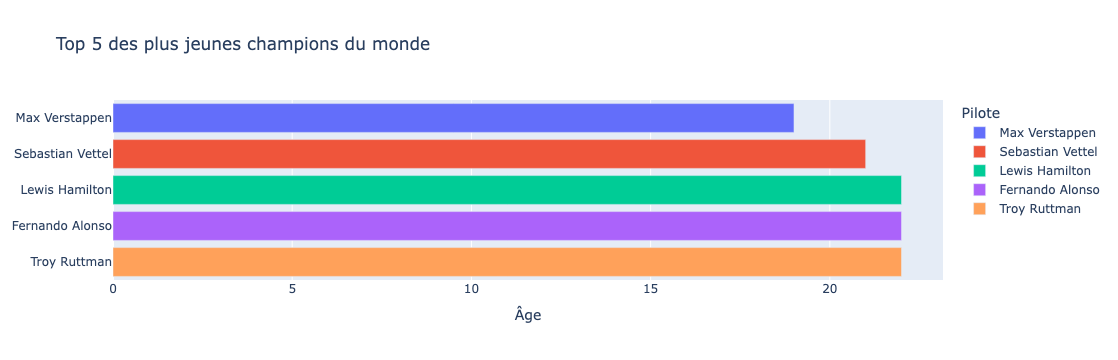

In [579]:

# Sélectionner les 10 plus jeunes champions du monde
top_10_youngest_champions = youngest_champions.head(5)

# Créer le graphique à barres horizontales avec Plotly Express
fig = px.bar(top_10_youngest_champions, x='age_at_first_championship', y='driver_name', color='driver_name', 
             title='Top 5 des plus jeunes champions du monde', labels={'age_at_first_championship': 'Âge au premier championnat', 'driver_name': 'Pilote'})
fig.update_yaxes(title=None)
fig.update_xaxes(title='Âge')
fig.show()

### Des points pour chaque pilote

In [495]:
# Calcul des points par course pour chaque pilote / peut voir pour constructeur 
points_per_race = merged_df2.groupby(['driver_name', 'raceId']).agg({'points': 'sum'}).reset_index()
points_per_race = points_per_race.groupby('driver_name').agg({'points': 'mean'}).reset_index()
# Calculer les points moyens par course pour chaque nationalité de pilote
average_points_by_nationality = merged_df2.groupby('nationality')['points'].mean().reset_index()
average_points_by_nationality.sort_values(by='points', ascending = False)
average_points_by_nationality.head()


,nationality,points
0,American,0.773044
1,American-Italian,0.000000
2,Argentine,1.873780
3,Argentine-Italian,0.000000
4,Australian,3.419760


In [496]:
# Regroupé les pilotes par nationalité, compté le nombre de pilotes pour chaque nationalité
driver_nationality = drivers_gold.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
driver_nationality.head()

,nationality,number of drivers
0,British,165
1,American,158
2,Italian,99
3,French,73
4,German,50


### Plus grand nombre de points marqués 

In [497]:
# la somme des points pour chaque pilote
points_per_driver = victoires.groupby(['driver_name', 'nationality']).agg({'points': 'sum'}).reset_index()

# Trouver le maximum de points pour chaque pilote
max_points_per_driver = points_per_driver.groupby(['driver_name']).agg({'points': 'mean'}).reset_index()

# Fusionner ces informations avec les détails sur les pilotes pour obtenir leur nom et leur nationalité
result = pd.merge(max_points_per_driver, victoires[['driver_name']], on=['driver_name'])
result = result.drop_duplicates()
result = result.sort_values(by='points', ascending=False)
# Afficher les pilotes avec le plus grand nombre de points marqués
result.head()


,driver_name,points
14373,Lewis Hamilton,4540.5
23184,Sebastian Vettel,3098.0
16252,Max Verstappen,2275.5
6382,Fernando Alonso,2203.0
13711,Kimi Räikkönen,1873.0


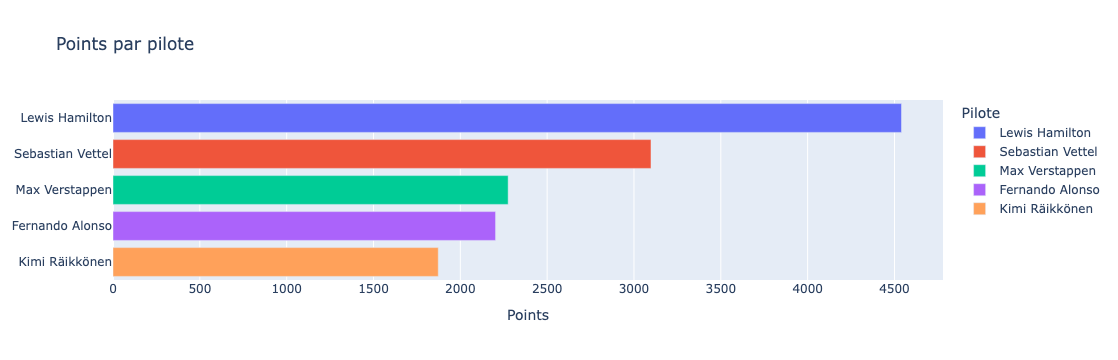

In [498]:
# Sélectionner les 10 pilotes avec le plus grand nombre de points marqués
top_10_points_per_driver = result.head(5)


# Créer le graphique à barres horizontales avec Plotly Express
fig = px.bar(top_10_points_per_driver, x='points', y='driver_name', color = 'driver_name', 
             title='Points par pilote', labels={'points': 'Points de pilote', 'driver_name': 'Pilote'})
fig.update_yaxes(title=None)
fig.update_xaxes(title='Points')
fig.show()

### Nombre de titres + pilotes par nationalité

In [499]:
# Compter le nombre de titres remportés par chaque nationalité
titles_per_nationality = victoires.groupby('nationality').size().reset_index(name='Titres')

# Compter le nombre de pilotes pour chaque nationalité
num_drivers_per_nationality = victoires.drop_duplicates(subset='driverId').groupby('nationality').size().reset_index(name='Nombre de pilotes')

# Fusionner les résultats sur la nationalité
result = pd.merge(titles_per_nationality, num_drivers_per_nationality, on='nationality')

# Trier les résultats par le nombre de titres décroissants
result = result.sort_values(by='Titres', ascending=False)
#result.info()
print(result.head(10))

   nationality  Titres  Nombre de pilotes
8      British    4454                165
24     Italian    3418                 99
18      French    3028                 73
19      German    2396                 50
7    Brazilian    1953                 32
0     American    1291                158
17     Finnish    1159                  9
36     Spanish     846                 15
4   Australian     835                 18
5     Austrian     690                 15


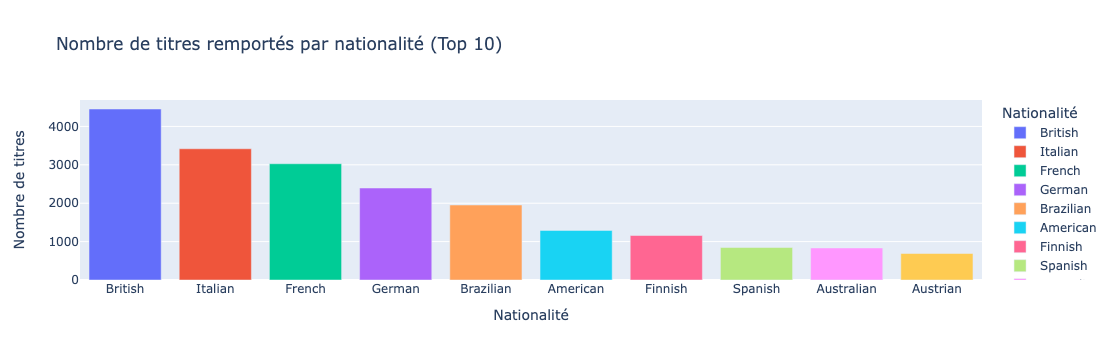

In [500]:
# Créer un graphique à barres
top_10 = result.head(10)


fig = px.bar(result.head(10), x='nationality', y='Titres', color='nationality',
             labels={'nationality': 'Nationalité', 'Titres': 'Nombre de titres'},
             title='Nombre de titres remportés par nationalité (Top 10)')
fig.update_layout(xaxis={'categoryorder':'total descending'})  
fig.show()

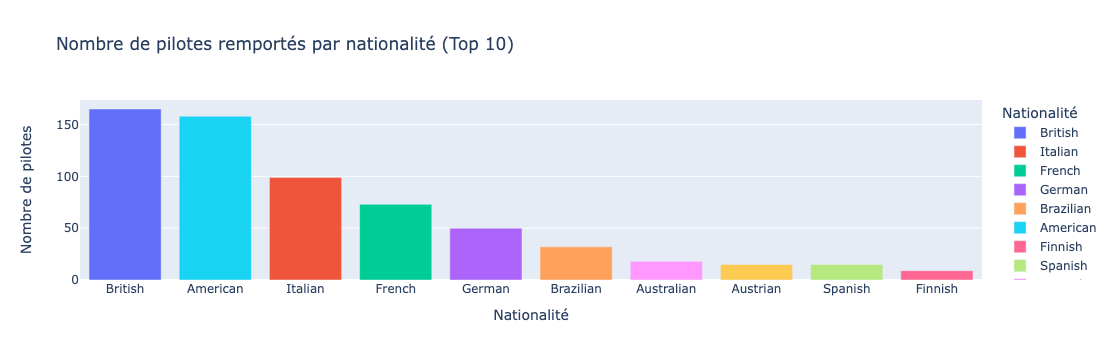

In [501]:
# Créer un graphique à barres
top_10 = result.head(10)

# Créer un graphique à barres avec Plotly Express
fig = px.bar(top_10, x='nationality', y='Nombre de pilotes', color='nationality',
             labels={'nationality': 'Nationalité', 'Nombre de pilotes': 'Nombre de pilotes'},
             title='Nombre de pilotes remportés par nationalité (Top 10)')
fig.update_layout(xaxis={'categoryorder':'total descending'})  
fig.show()

## Nombre de retiré par pilote 

In [568]:
#victoires = merged_df2.merge(seasons , on = 'year')
#victoires.info()
#Filtrer les résultats pour inclure uniquement les premières places
pilotes_retired = victoires[victoires['statusId'] == 31]
# Compter le nombre de retiré par pilote
retired_count = pilotes_retired.groupby(['driver_name','nationality' ]).size().reset_index(name='Nombre de retiré')

# Trier les résultats par le nombre de retiré
retired_count = retired_count.sort_values(by='Nombre de retiré', ascending=False)
# Sélectionner uniquement les pilotes avec le plus grand nombre de retiré par saison
retired_count = retired_count.drop_duplicates(subset='driver_name', keep='first')


# Afficher les pilotes avec le plus grand nombre de retiré
retired_count.head(10)

,driver_name,nationality,Nombre de retiré
54,Romain Grosjean,French,6
45,Pastor Maldonado,Venezuelan,4
12,Esteban Gutiérrez,Mexican,3
15,Fernando Alonso,Spanish,3
1,Bruno Senna,Brazilian,3
33,Kamui Kobayashi,Japanese,3
26,Jenson Button,British,3
6,Daniel Ricciardo,Australian,3
7,Daniil Kvyat,Russian,2
14,Felipe Nasr,Brazilian,2


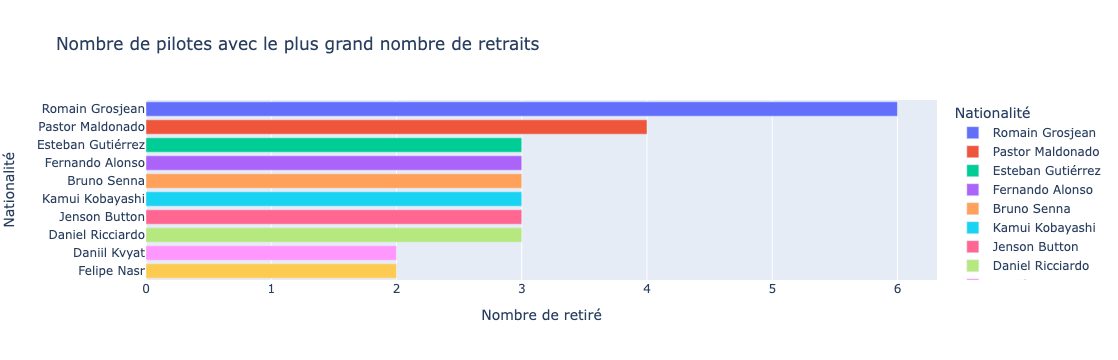

In [576]:
# Créer un graphique à barres
top_10_retired = retired_count.head(10)

# Créer un graphique à barres avec Plotly Express
fig = px.bar(top_10_retired, x='Nombre de retiré', y='driver_name', color='driver_name',
             labels={'driver_name': 'Nationalité', 'Nombre de retiré': 'Nombre de retiré'},
             title='Nombre de pilotes avec le plus grand nombre de retraits')
fig.update_layout(xaxis={'categoryorder':'total descending'})  
fig.show()


## Constructor


### Pays constructeurs 

In [506]:
constructor_country = merged_df4.groupby('constructor_nationality').constructors_name.nunique().reset_index()

constructor_country = constructor_country.rename(columns ={'constructors_name':'constructor_counts'})

constructor_country1 = constructor_country[constructor_country.constructor_counts >= 10].sort_values('constructor_counts', ascending = False)

constructor_country1.loc[len(constructor_country1.index)+1] = ['Others', (constructor_country.constructor_counts.sum() - constructor_country1.constructor_counts.sum())]


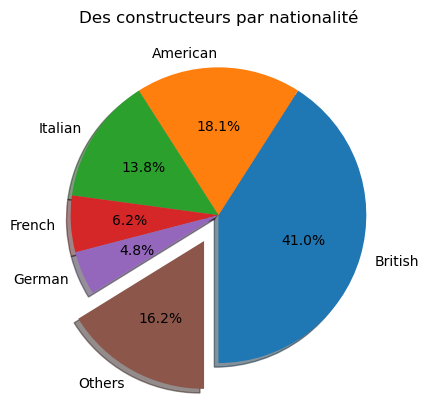

In [507]:
### la répartition des constructeurs par nationalité.
plt.title('Des constructeurs par nationalité')

myexplode1 = [0,0,0,0,0,0.2]

plt.pie(constructor_country1.constructor_counts, labels = constructor_country1.constructor_nationality, autopct='%1.1f%%', explode= myexplode1, shadow=True, startangle=270);


### Des champions Constructeurs chaque année

In [508]:
con_analysis_df = merged_df4.groupby(['year','constructors_name']).agg({'points': ['sum'],'raceId':['count'],'positionOrder':['mean','std'] }).reset_index()
con_analysis_df.columns = ['_'.join(col).strip() for col in con_analysis_df.columns.values]
# Trier les données par année et par points dans l'ordre décroissant
con_analysis_df_sorted = con_analysis_df.sort_values(by=['year_', 'points_sum'], ascending=[False, False])



In [509]:
### Renommer 
# Supprimer les doublons en conservant la première occurrence de chaque année
best_constructors_by_year = con_analysis_df_sorted.drop_duplicates(subset='year_', keep='first')
con_analysis_df = con_analysis_df.rename(columns ={'year_':'year','constructors_name_':'constructors_name'})
best_constructors_by_year.head(10)

,year_,constructors_name_,points_sum,raceId_count,positionOrder_mean,positionOrder_std
1099,2023,Red Bull,466.0,24,2.708333,3.250139
1089,2022,Red Bull,724.0,44,4.454545,5.592580
1078,2021,Mercedes,604.5,44,5.409091,5.743827
1066,2020,Mercedes,573.0,34,3.735294,4.223375
1055,2019,Mercedes,739.0,42,3.238095,3.792223
1045,2018,Mercedes,655.0,42,3.857143,3.960607
1035,2017,Mercedes,668.0,40,3.175000,2.934215
1025,2016,Mercedes,765.0,42,3.476190,5.003599
1015,2015,Mercedes,703.0,38,3.210526,4.521169
1005,2014,Mercedes,701.0,38,4.210526,6.151941


#### Afin d'obtenir le nombre d'inscriptions à des courses par les constructeurs, nous devons regrouper par nom de constructeur et identifiant de course, puis à nouveau regrouper par nom de constructeur, car pour chaque course, le constructeur inscrit deux voitures dans le nom de son équipe. Nous obtiendrons également la moyenne et l'écart type des positions terminées pour tracer un graphique

In [510]:
con_analysis_df2 = merged_df4.groupby(['constructors_name', 'raceId']).agg({'positionOrder':['mean', 'std']}).reset_index()

con_analysis_df2.columns = ['_'.join(col).strip() for col in con_analysis_df2.columns.values]

con_analysis_df3 = con_analysis_df2.groupby(['constructors_name_']).agg({'constructors_name_':['count'],'positionOrder_mean':['mean'] , 'positionOrder_std' :['mean']}).reset_index()

con_analysis_df3.columns = ['_'.join(col).strip() for col in con_analysis_df3.columns.values]

con_analysis_df3 = con_analysis_df3.rename(columns = {'constructors_name__' : 'constructors_name',
                                                      'constructors_name__count' : 'constructor_entry',
                                                      'positionOrder_mean_mean' : 'positionOrder_mean', 
                                                      'positionOrder_std_mean' : 'positionOrder_std'})

#### Top 10 des constructeurs avec le plus grand nombre d’inscriptions à des courses au fil des ans

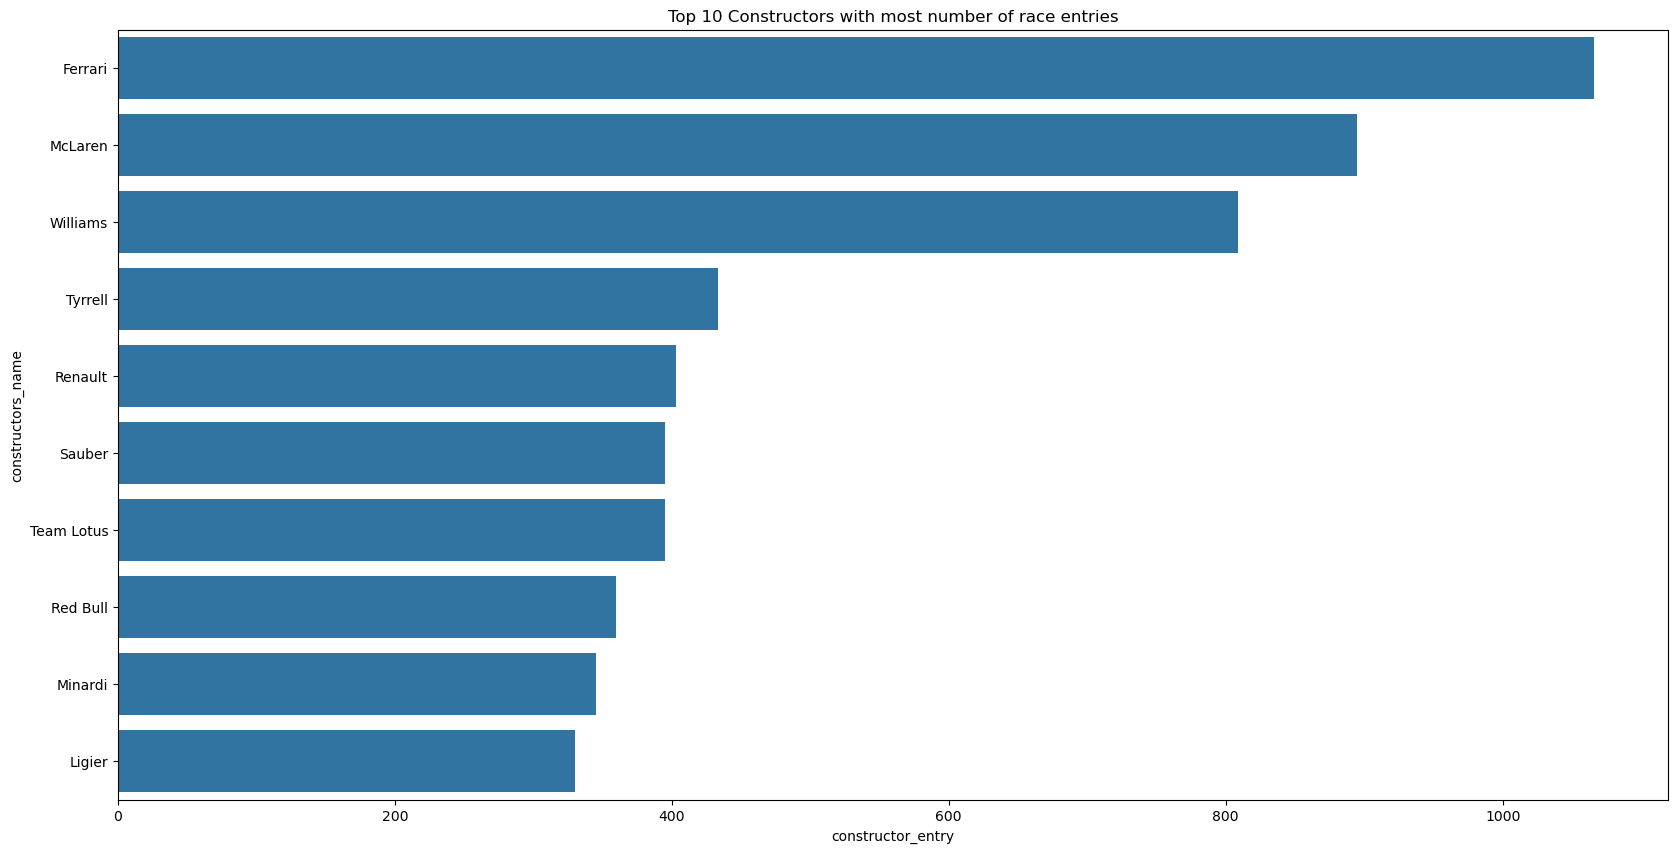

In [511]:
x = con_analysis_df3.sort_values('constructor_entry', ascending = False).head(10)
plt.figure(figsize = (20,10))
plt.title('Top 10 Constructors with most number of race entries')
sns.barplot(y = 'constructors_name' , x = 'constructor_entry' , data = x );


### Trouver le constructeur le plus performant, nous réduisons les constructeurs avec au moins 200 inscriptions à des courses et trions en fonction de leur position moyenne

In [512]:
con_analysis_df3 = con_analysis_df3[con_analysis_df3.constructor_entry > 200]
con_analysis_df3 = con_analysis_df3.sort_values('positionOrder_mean').head(10)


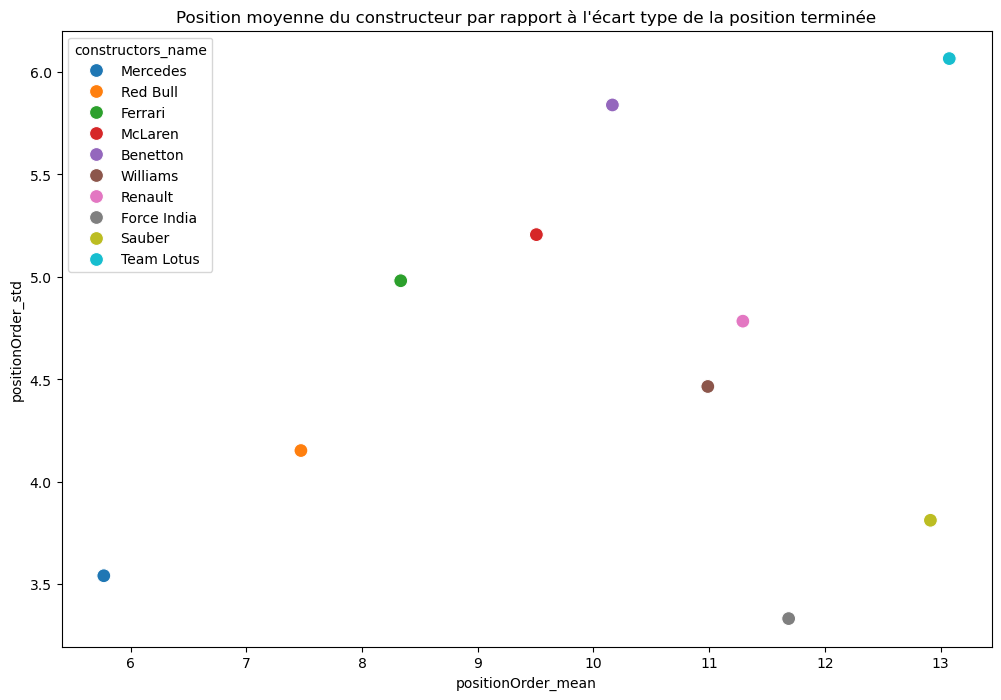

In [513]:
plt.figure(figsize = (12,8))
plt.title("Position moyenne du constructeur par rapport à l'écart type de la position terminée")
sns.scatterplot(x = 'positionOrder_mean' , y = 'positionOrder_std' , hue = 'constructors_name' ,s=100, data = con_analysis_df3);

#### => commentaire sur Docs 

### Le nombre de participation par chaque constructeur. 

In [514]:
team = constructors_gold.merge(results,on='constructorId',how = 'left')
#team.info()

### Classement des constructeurs

In [544]:
# Assurez-vous que les colonnes utilisées pour la fusion ont les mêmes noms

#constructor_standings.info()
#constructors_gold.info()
# Fusionnez les DataFrames en utilisant les colonnes appropriées
merge_results_races_constructors = constructors_gold.merge(merged_df1, on='constructorId', how='left')
merge_clss_cons = merge_results_races_constructors.merge(seasons, on='year', how='left')
seasons_constructors_standings = merge_clss_cons.merge(constructor_standings, on=["constructorId"])
# Assurez-vous que les types de données sont corrects
seasons_constructors_standings['year'] = seasons_constructors_standings['year'].astype(int)
seasons_constructors_standings = seasons_constructors_standings.drop(columns=['position_y', 'points_y', 'raceId_y', 'positionText_y'])
# Calculez les performances des équipes par année
team_performance = seasons_constructors_standings.groupby(['year', 'constructors_name'])['points_x'].sum().reset_index()

# Classement des performances des équipes par année
team_ranking = team_performance.reset_index(drop=True)

# Trouvez le meilleur constructeur pour chaque année
best_constructor_per_year = team_ranking.loc[team_ranking.groupby('year')['points_x'].idxmax()]
best_constructor_per_year = best_constructor_per_year.sort_values('year', ascending = False)
# Afficher le meilleur constructeur pour chaque année
best_constructor_per_year.head(5)



,year,constructors_name,points_x
960,2023,Ferrari,168960.0
950,2022,Ferrari,531456.0
940,2021,Ferrari,330240.0
930,2020,McLaren,180790.0
917,2019,Ferrari,516096.0


### les performances des équipes par nationalité

In [516]:

team_performance_by_nationality = seasons_constructors_standings.groupby('nationality')['points_x'].sum().reset_index()

team_performance_by_nationality = team_performance_by_nationality.sort_values('points_x', ascending=False)

team_performance_by_nationality.head(5)


,nationality,points_x
13,Italian,10948584.18
5,British,9900083.50
2,Austrian,2445508.00
9,German,1964972.44
8,French,883046.00



###  Calculer le nombre total de départs par constructeu

In [517]:

departures_per_constructor = merge_results_races_constructors.groupby('constructors_name')['raceId'].count().reset_index()
departures_per_constructor = departures_per_constructor.rename(columns={'raceId': 'Nombre de départs'})

departures_per_constructor = departures_per_constructor.sort_values('Nombre de départs', ascending=False)
departures_per_constructor.head(5)



,constructors_name,Nombre de départs
74,Ferrari,2371
135,McLaren,1855
208,Williams,1609
202,Tyrrell,881
191,Team Lotus,871


### le nombre total de victoires par constructeur

In [518]:

victories_per_constructor = merge_results_races_constructors[merge_results_races_constructors['positionOrder'] == 1].groupby('constructors_name')['raceId'].count().reset_index()
victories_per_constructor = victories_per_constructor.rename(columns={'raceId': 'Nombre de victoires'})

victories_per_constructor = victories_per_constructor.sort_values('Nombre de victoires', ascending=False)
victories_per_constructor.head(5)


,constructors_name,Nombre de victoires
16,Ferrari,243
30,McLaren,179
32,Mercedes,125
45,Williams,114
36,Red Bull,104


In [519]:
# Regrouper les données par saison et par constructeur, puis compter le nombre maximum de victoires pour chaque groupe
max_victories_per_season = merge_results_races_constructors[merge_results_races_constructors['positionOrder'] == 1].groupby(['year', 'constructors_name'])['raceId'].count().reset_index()

# Renommer la colonne pour refléter le nombre de victoires
max_victories_per_season = max_victories_per_season.rename(columns={'raceId': 'Nombre de victoires'})

# Trier les résultats par ordre décroissant du nombre de victoires
max_victories_per_season = max_victories_per_season.sort_values(['year', 'Nombre de victoires'], ascending=[False, True])
# Filtrer les données pour les années de 2013 à 2023
filtered_data = max_victories_per_season[(max_victories_per_season['year'] >= 2013) & (max_victories_per_season['year'] <= 2023)]

# Obtenir le meilleur constructeur pour chaque année dans l'intervalle spécifié
best_constructor_in_range = filtered_data.loc[filtered_data.groupby('year')['Nombre de victoires'].idxmax()]
# Regrouper les données par année et trouver l'indice de la ligne correspondant au maximum de victoires pour chaque année
best_constructor_in_range.head(10)



,year,constructors_name,Nombre de victoires
244,2013.0,Red Bull,13
245,2014.0,Mercedes,16
248,2015.0,Mercedes,16
249,2016.0,Mercedes,19
252,2017.0,Mercedes,12
255,2018.0,Mercedes,11
258,2019.0,Mercedes,15
261,2020.0,Mercedes,13
267,2021.0,Red Bull,11
270,2022.0,Red Bull,17


### quels constructeurs contribuent au tour le plus rapide ?

In [520]:
cons_fast = pd.merge(lap_times, results, on=['raceId', 'driverId'])
#lap_times.info()

cons_fast = pd.merge(cons_fast, constructors_gold, on='constructorId')
#cons_fast.info()
fastest_laps_count = cons_fast.groupby(['constructorId', 'constructors_name'])['fastestLap'].count().reset_index()
fastest_laps_count = fastest_laps_count.sort_values('fastestLap', ascending=False)


result = fastest_laps_count[['constructors_name', 'fastestLap']]
result.head(10)




,constructors_name,fastestLap
5,Ferrari,56093
0,McLaren,53712
2,Williams,53542
8,Red Bull,38384
14,Sauber,34180
30,Mercedes,30507
3,Renault,28992
4,Toro Rosso,26921
9,Force India,22046
38,Haas F1 Team,16155


### quels constructeurs ont remporté le plus de championnats ?

In [521]:

cons_champ = pd.merge(constructor_standings, constructors_gold, on='constructorId')

world_titles_count = cons_champ[cons_champ['position'] == 1].groupby(['constructorId', 'constructors_name']).size().reset_index(name='WorldTitles')

world_titles_count = world_titles_count.sort_values('WorldTitles', ascending=False)

result = world_titles_count.head(1)[['constructors_name', 'WorldTitles']]
result


,constructors_name,WorldTitles
4,Ferrari,234


## Circuit

### Ou se situe les courses de F1.? 

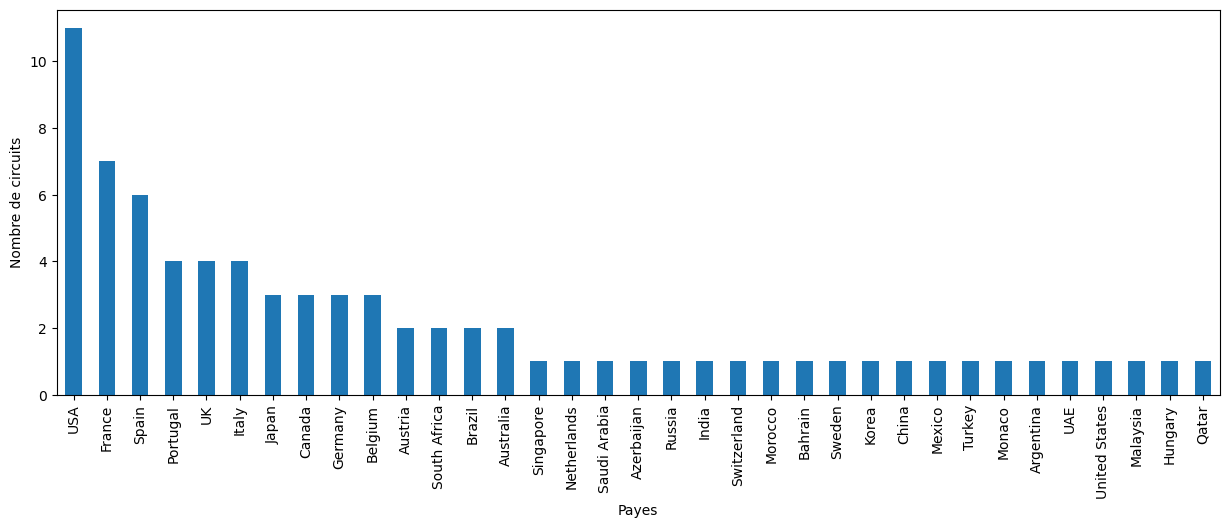

In [522]:

fig, ax = plt.subplots(figsize=(15,5))

circuits['country'].value_counts().plot.bar(ax=ax)

ax.set_xlabel("Payes")
ax.set_ylabel("Nombre de circuits");

### les 10 premiers circuits plus longs

In [523]:

circuits_longueurs_valides =  circuits[circuits['alt'] != '\\N']
circuits_longueurs_valides = circuits_longueurs_valides.drop(["url"], axis = 1)
circuits_longueurs_valides['alt'] = pd.to_numeric(circuits_longueurs_valides['alt'])

# Trier les circuits en fonction de leur longueur de manière décroissante
circuits_longueurs_valides = circuits_longueurs_valides.sort_values(by='alt', ascending=False)

top_10_circuits_longues = circuits_longueurs_valides.head(10)
top_10_circuits_longues

,circuitId,circuitRef,name,location,country,lat,lng,alt
31,32,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227
29,30,kyalami,Kyalami,Midrand,South Africa,-25.9894,28.07670,1460
35,36,jacarepagua,Autódromo Internacional Nelson Piquet,Rio de Janeiro,Brazil,-22.9756,-43.39500,1126
50,51,charade,Charade Circuit,Clermont-Ferrand,France,45.7472,3.03889,790
17,18,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,785
69,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.76470,678
56,57,zeltweg,Zeltweg,Styria,Austria,47.2039,14.74780,676
43,44,las_vegas,Las Vegas Street Circuit,Nevada,USA,36.1162,-115.17400,639
44,45,jarama,Jarama,Madrid,Spain,40.6171,-3.58558,609
15,16,fuji,Fuji Speedway,Oyama,Japan,35.3717,138.92700,583


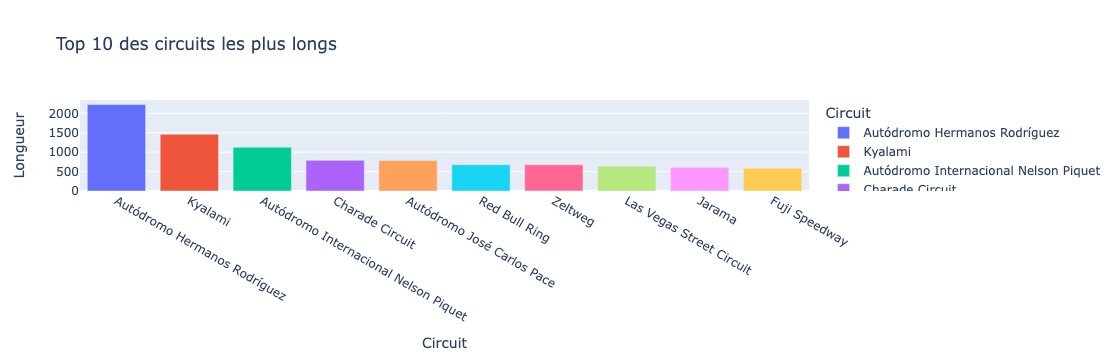

In [546]:
# Créer un graphique à barres avec Plotly Express
fig = px.bar(top_10_circuits_longues, x='name', y='alt', color='name',
             labels={'name': 'Circuit', 'alt': 'Longueur '},
             title='Top 10 des circuits les plus longs')
fig.update_layout(xaxis={'categoryorder':'total descending'})  
fig.show()


In [524]:
fastestlap_df = races_gold.merge(circuits_gold , on = 'circuitId')
fastestlap_df = fastestlap_df.merge(results, on = 'raceId')


#### Top 20 des circuits avec le plus grand nombre de courses organisées
Déjà dans la problèmetique 2-3

In [551]:
most_circuits = fastestlap_df.groupby(['year','circuit_name']).count().reset_index()

m = most_circuits['circuit_name'].value_counts().reset_index().head(20)
m =  m.rename(columns ={'circuit_name': 'count', 'index': 'circuit_name'})
#m.info()

In [549]:
## Avec le nombre d'être utilisé. 
counts = fastestlap_df['circuitId'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_pop.head(10)

,circuitId,number of times
0,9,422
1,14,402
2,11,402
3,4,402
4,3,400
5,6,380
6,13,380
7,18,378
8,1,362
9,17,342


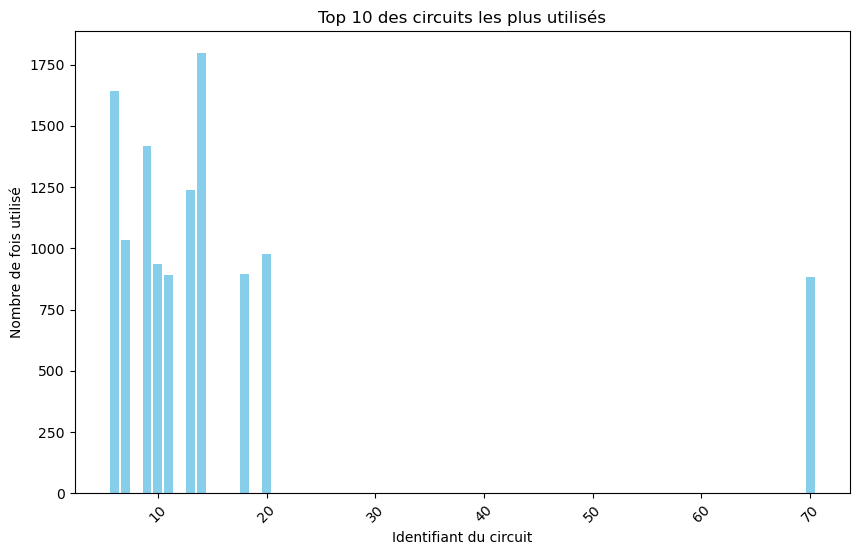

In [547]:
# Sélectionner les 10 premiers circuits les plus populaires
top_10_circuits_populaires = circuits_pop.head(10)

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(top_10_circuits_populaires['circuitId'], top_10_circuits_populaires['number of times'], color='skyblue')
plt.xlabel('Identifiant du circuit')
plt.ylabel('Nombre de fois utilisé')
plt.title('Top 10 des circuits les plus utilisés')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()

#### les plus rapides afin de voir comment la vitesse des voitures a changé au fil des ans

In [528]:
fastestlap_df['fastestLapTime']

0        1:28.020
1        1:29.066
2        1:28.916
3        1:28.416
4        1:28.712
           ...   
26075    1:31.736
26076    1:32.401
26077    1:31.562
26078    1:32.006
26079    1:32.384
Name: fastestLapTime, Length: 26080, dtype: object

#### Les données du tour le plus rapide (fast Lap)  ne sont pas dans un format pouvant être utilisé à des fins d’analyse. Afin de les rendre utilisables, nous allons supprimer les données séparément, les convertir en valeurs numériques et les additionner.

In [529]:
fastestlap_df['f_lap_1'] = fastestlap_df['fastestLapTime'].apply(lambda x : (x.split('.')[-1]))
fastestlap_df['f_lap_2'] = fastestlap_df['fastestLapTime'].apply(lambda x : (x.split('.')[0]))
fastestlap_df['f_lap_3'] = fastestlap_df['f_lap_2'].apply(lambda x: (x.split(':')[-1]))
fastestlap_df['f_lap_4'] = fastestlap_df['f_lap_2'].apply(lambda x: (x.split(':')[0]))


fastestlap_df['f_lap_1'] = fastestlap_df['f_lap_1'].str.strip()
fastestlap_df['f_lap_3'] = fastestlap_df['f_lap_3'].str.strip()
fastestlap_df['f_lap_4'] = fastestlap_df['f_lap_4'].str.strip()

fastestlap_df['f_lap_1'] = pd.to_numeric(fastestlap_df['f_lap_1'] , errors = 'coerce')
fastestlap_df['f_lap_3'] = pd.to_numeric(fastestlap_df['f_lap_3'] , errors = 'coerce')
fastestlap_df['f_lap_4'] = pd.to_numeric(fastestlap_df['f_lap_4'] , errors = 'coerce')

#### fusionner les données et obtenir les fast lap en millionseconde

In [530]:
fastestlap_df['fastest_lap'] = fastestlap_df['f_lap_1'] + fastestlap_df['f_lap_3']*1000 + fastestlap_df['f_lap_4']*60*1000
fastestlap_df.head()

,raceId,year,round,circuitId,race_name,date,circuitRef,circuit_name,city,country,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,f_lap_1,f_lap_2,f_lap_3,f_lap_4,fastest_lap
0,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,17,3,1:28.020,216.891,1,20.0,1:28,28.0,1.0,88020.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,43,14,1:29.066,214.344,1,66.0,1:29,29.0,1.0,89066.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,50,10,1:28.916,214.706,1,916.0,1:28,28.0,1.0,88916.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,53,6,1:28.416,215.920,1,416.0,1:28,28.0,1.0,88416.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,...,53,9,1:28.712,215.199,1,712.0,1:28,28.0,1.0,88712.0


#### Supprimer les données unnecessaires

In [531]:
fastestlap_df = fastestlap_df.drop(columns = ['f_lap_4','f_lap_3', 'f_lap_2','f_lap_1'])

In [532]:
x = fastestlap_df.sort_values('year')

x.isnull().sum()

raceId                 0
year                   0
round                  0
circuitId              0
race_name              0
date                   0
circuitRef             0
circuit_name           0
city                   0
country                0
resultId               0
driverId               0
constructorId          0
number                 0
grid                   0
position               0
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
fastest_lap        18465
dtype: int64

In [533]:
#### On voit peut-être il y a des valeurs nuls donc
x.groupby('year')[['fastest_lap']].max().head(10)

,fastest_lap
year,
1950,NaN
1951,NaN
1952,NaN
1953,NaN
1954,NaN
1955,NaN
1956,NaN
1957,NaN
1958,NaN


In [534]:
x.groupby('year')[['fastest_lap']].max().tail(10)

,fastest_lap
year,
2014,119505.0
2015,151939.0
2016,168804.0
2017,133579.0
2018,114320.0
2019,110451.0
2020,134103.0
2021,110850.0
2022,125585.0



#### Obtenir la première ligne valide dans les données du tour le plus rapide

In [535]:
print(x.fastest_lap.first_valid_index())


15502


In [536]:
x.loc[15502]

raceId                                      98
year                                      2004
round                                        9
circuitId                                   19
race_name             United States Grand Prix
date                                2004-06-20
circuitRef                        indianapolis
circuit_name       Indianapolis Motor Speedway
city                              Indianapolis
country                                    USA
resultId                                  1677
driverId                                    11
constructorId                               16
number                                      10
grid                                         3
position                                     3
positionText                                 3
positionOrder                                3
points                                     6.0
laps                                        73
time                                   +22.036
milliseconds 

#### alors les fastest lap data est validées depuis 2004, donc on analyse les données de fastes lap depuis 2004. 

In [537]:
fastestlap_df = fastestlap_df[(fastestlap_df['year'].between(2004,2022, inclusive = 'both'))]

### Circuits ayant accueilli le plus grand nombre de courses depuis 2004

In [552]:
h = fastestlap_df.groupby(['year','circuit_name']).count().reset_index()
h['circuit_name'].value_counts()
h.head()

,year,circuit_name,raceId,round,circuitId,race_name,date,circuitRef,city,country,...,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,fastest_lap
0,2004,Albert Park Grand Prix Circuit,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
1,2004,Autodromo Enzo e Dino Ferrari,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
2,2004,Autodromo Nazionale di Monza,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,19
3,2004,Autódromo José Carlos Pace,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
4,2004,Bahrain International Circuit,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


#### Répartir les données séparément pour 6 des circuits populaires qui ont accueilli le plus grand nombre de courses depuis 2004

In [553]:
lap_time_monza = fastestlap_df[fastestlap_df['circuit_name'] == 'Autodromo Nazionale di Monza']
lap_time_monaco = fastestlap_df[fastestlap_df['circuit_name']== 'Circuit de Monaco']
lap_time_silverstone = fastestlap_df[fastestlap_df['circuit_name']== 'Silverstone Circuit']
lap_time_catalunya = fastestlap_df[fastestlap_df['circuit_name']=='Circuit de Barcelona-Catalunya']
lap_time_hungaroring = fastestlap_df[fastestlap_df['circuit_name']== 'Hungaroring']
lap_time_spa = fastestlap_df[fastestlap_df['circuit_name']== 'Circuit de Spa-Francorchamps']

#### Retour les fastest lap en groupant par année ( le tour plus rapide)

In [554]:
lap = lap_time_silverstone.groupby('year')[['fastest_lap']].min().reset_index()
lap1 =  lap_time_monaco.groupby('year')[['fastest_lap']].min().reset_index()
lap2 =  lap_time_monza.groupby('year')[['fastest_lap']].min().reset_index()
lap3 = lap_time_catalunya.groupby('year')[['fastest_lap']].min().reset_index()
lap4 = lap_time_hungaroring.groupby('year')[['fastest_lap']].min().reset_index()
lap5 = lap_time_spa.groupby('year')[['fastest_lap']].min().reset_index()


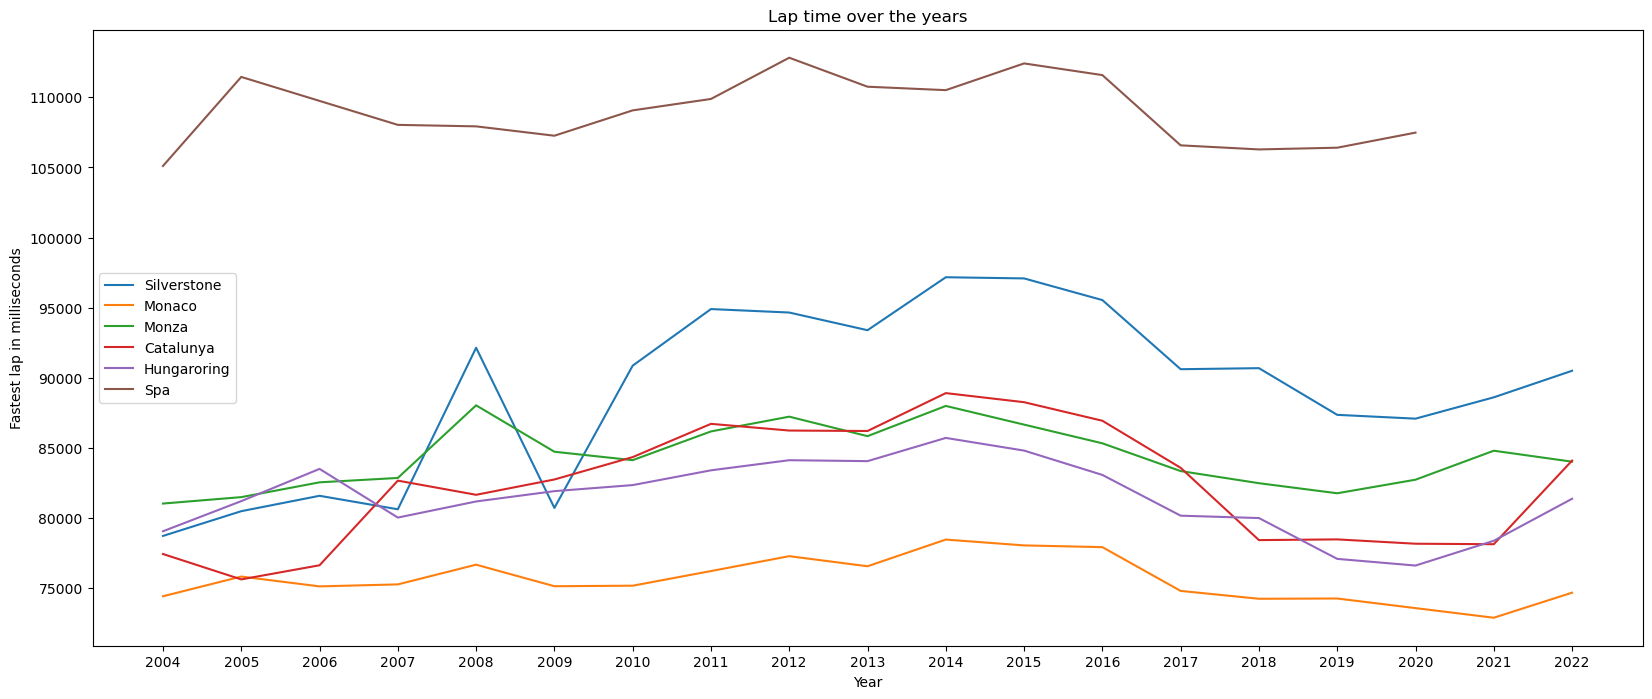

In [555]:
plt.figure(figsize = (20,8))
plt.plot(lap.year,lap.fastest_lap)
plt.plot(lap1.year,lap1.fastest_lap)
plt.plot(lap2.year,lap2.fastest_lap)
plt.plot(lap3.year,lap3.fastest_lap)
plt.plot(lap4.year,lap4.fastest_lap)
plt.plot(lap5.year,lap5.fastest_lap)
plt.xticks(np.arange(min(lap.year),max(lap.year)+1 , 1.0))
plt.ylabel('Fastest lap in milliseconds')
plt.xlabel('Year')
plt.title('Lap time over the years')
plt.legend(['Silverstone', 'Monaco','Monza','Catalunya','Hungaroring','Spa']);

=> Commantaires sur Docs

### Circuits avec le plus de crash

In [542]:
# Sélectionner uniquement les résultats des courses avec les statuts d'accident
circuit_accidents = merged_df4.loc[merged_df4['statusId'].isin([3, 4, 20])]
circuit_accidents = circuit_accidents[['circuit_name', 'status']]

# Compter le nombre d'accidents
circuit_accidents = pd.crosstab(index=circuit_accidents['circuit_name'], columns=circuit_accidents['status'])

# Réinitialiser l'index pour faciliter la manipulation
circuit_accidents = circuit_accidents.reset_index()
#circuit_accidents.info()

num_races = circuit_accidents['circuit_name'].value_counts().reset_index()
#num_races.info()
num_races = circuit_accidents['circuit_name'].value_counts().reset_index().rename(columns={'index': 'circuit_name', 'circuit_name': 'num_of_races'})
num_races['circuit_name'] = num_races['circuit_name'].astype(str)  # Convertir en object
circuit_accidents = pd.merge(circuit_accidents, num_races, on='circuit_name', how='left')

circuit_accidents['total_accidents'] = circuit_accidents['Accident'] + circuit_accidents['Collision'] + circuit_accidents['Spun off']

circuit_accidents = circuit_accidents.sort_values(by='total_accidents', ascending=False)
circuit_accidents[['circuit_name', 'Accident', 'Collision', 'Spun off', 'total_accidents']].head(10)




,circuit_name,Accident,Collision,Spun off,total_accidents
24,Circuit de Monaco,119,72,66,257
7,Autodromo Nazionale di Monza,52,40,52,144
27,Circuit de Spa-Francorchamps,53,47,37,137
19,Circuit Gilles Villeneuve,44,43,46,133
65,Silverstone Circuit,39,42,46,127
10,Autódromo José Carlos Pace,38,42,31,111
52,Nürburgring,62,24,21,107
5,Autodromo Enzo e Dino Ferrari,12,21,55,88
38,Indianapolis Motor Speedway,60,9,18,87
36,Hockenheimring,25,34,26,85


### Quel Pilote détient le record du Tour par circuit ?


In [543]:
# Merge lap_times with races based on raceId
lap_races = pd.merge(lap_times, races_gold, on='raceId')

# Merge merged_df with drivers_df based on driverId
lap_races = pd.merge(lap_races, drivers_gold, on='driverId')

#lap_races.info()

fastest_lap_per_circuit = lap_races.groupby(['circuitId', 'race_name'])['milliseconds'].min().reset_index()
# Merge with merged_df to get the driver details
fastest_lap_per_circuit = pd.merge(fastest_lap_per_circuit, lap_races, on=['circuitId','race_name','milliseconds'])
fastest_lap_per_circuit.head()


,circuitId,race_name,milliseconds,raceId,driverId,lap,position,time,year,round,date,dob,nationality,driver_name,age
0,1,Australian Grand Prix,80235,1100,815,53,7,1:20.235,2023,3,2023-04-02,1990-01-26,Mexican,Sergio Pérez,34
1,2,Malaysian Grand Prix,94080,983,20,41,4,1:34.080,2017,15,2017-10-01,1987-07-03,German,Sebastian Vettel,37
2,3,Bahrain Grand Prix,90252,92,30,7,1,1:30.252,2004,3,2004-04-04,1969-01-03,German,Michael Schumacher,55
3,3,Sakhir Grand Prix,55404,1046,847,80,14,0:55.404,2020,16,2020-12-06,1998-02-15,British,George Russell,26
4,4,Spanish Grand Prix,75641,75,21,66,5,1:15.641,2005,5,2005-05-08,1973-01-14,Italian,Giancarlo Fisichella,51
